In [2]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from phe import pickle, query, download, plot_summary

In [2]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2020-12-29,2020-12-28,United Kingdom,K02000001,4216,NaN,90.0,357238.0
1,2020-12-29,2020-12-27,United Kingdom,K02000001,31234,NaN,244.0,352702.0
2,2020-12-29,2020-12-26,United Kingdom,K02000001,36172,NaN,305.0,269876.0
3,2020-12-29,2020-12-25,United Kingdom,K02000001,13450,NaN,286.0,339024.0
4,2020-12-29,2020-12-24,United Kingdom,K02000001,28745,NaN,338.0,463123.0
...,...,...,...,...,...,...,...,...
348,2020-12-29,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
349,2020-12-29,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
350,2020-12-29,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
351,2020-12-29,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [3]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England')

PosixPath('/Users/chris/coronavirus/data/england_2020-12-29.csv')

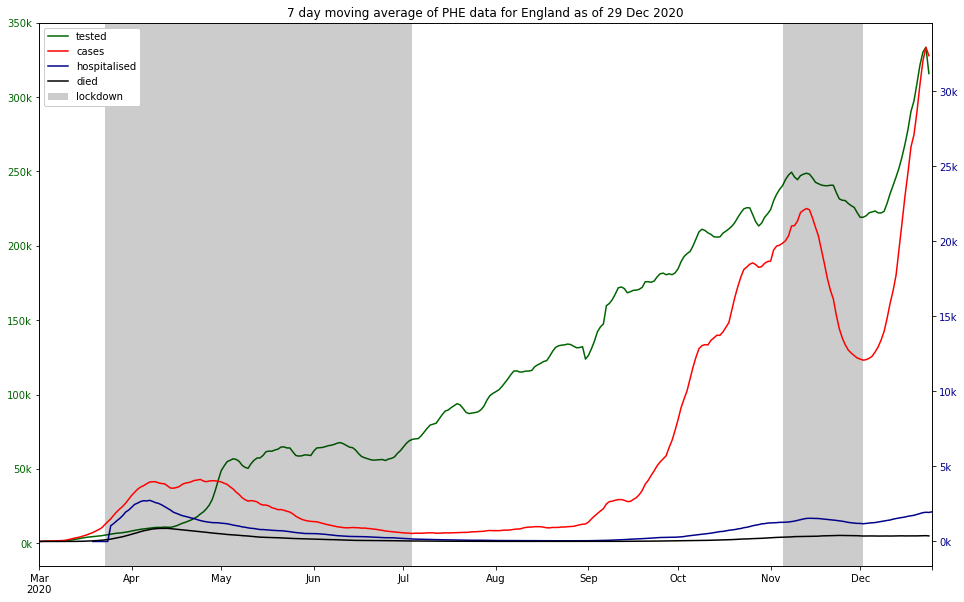

In [3]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [5]:
metrics = (
    new_cases_by_specimen_date, 
    new_deaths_by_death_date, 
    unique_people_tested_sum,  
    unique_cases_positivity_sum, 
    new_cases_rate
)

In [14]:
download(nation, nation, *metrics)

PosixPath('/Users/chris/coronavirus/data/nation_2020-12-29.csv')

In [7]:
download(region, region, *metrics)

PosixPath('/Users/chris/coronavirus/data/region_2020-12-29.csv')

In [8]:
download(ltla, ltla, *metrics)

PosixPath('/Users/chris/coronavirus/data/ltla_2020-12-29.csv')

In [9]:
download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change)

PosixPath('/Users/chris/coronavirus/data/msoa_2020-12-29.csv')